In [1]:
import pandas as pd

dataset = pd.read_csv('churn.csv')[0:201]
dataset.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
dataset.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.00000
mean,640.467662,37.965174,5.174129,74504.686269,1.542289,0.676617,0.482587,99189.930398,0.20398
std,108.463313,9.763902,2.987395,62726.490142,0.591145,0.468935,0.500944,57641.051220,0.40396
min,376.000000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,600.360000,0.00000
25%,553.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,47125.110000,0.00000
50%,646.000000,36.000000,5.000000,96645.540000,2.000000,1.000000,0.000000,99449.860000,0.00000
75%,722.000000,43.000000,8.000000,125851.930000,2.000000,1.000000,1.000000,147132.460000,0.00000
max,850.000000,75.000000,10.000000,213146.200000,4.000000,1.000000,1.000000,199725.390000,1.00000


In [3]:
dataset['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

In [4]:
dataset['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [5]:
# Geography and gender are not in numbers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

dataset = pd.get_dummies(dataset, columns=['Geography'])
dataset.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


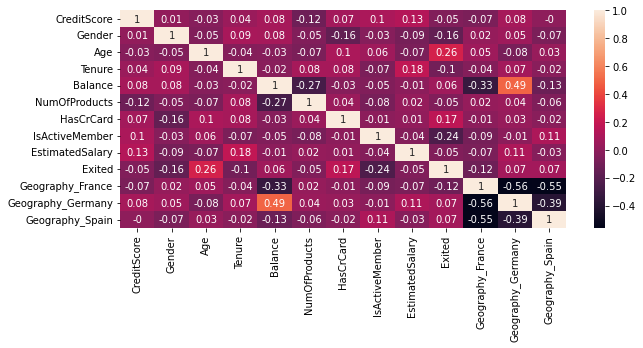

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
correl_matrix = dataset.corr().round(2)
sns.heatmap(data=correl_matrix, annot=True)
plt.show()


In [11]:
# Hence we can see that most important features for predicting class label 'Exited' are : Age, isActiveMember, HasCrCard, Gender, Geography_France

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X = dataset[['Age', 'Geography_France',
             'IsActiveMember', 'HasCrCard', 'Gender']]
y = dataset['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=13)

dtree = DecisionTreeClassifier(random_state=13)
dtree.fit(X_train, y_train)
dtree.score(X_test, y_test)
y_pred_train = dtree.predict(X_train)
# y_pred_test = dtree.predict(X_test)


print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       147
           1       0.96      0.82      0.89        33

    accuracy                           0.96       180
   macro avg       0.96      0.91      0.93       180
weighted avg       0.96      0.96      0.96       180



In [ ]:
# input and predicting
X_ip = list(map(int,input("Enter Age, isActiveMember, HasCrCard, Gender, Geography_France : ").split()))[:5]

print("predicted class : ")
dtree.predict([X_ip])[0]

predicted class : 


0

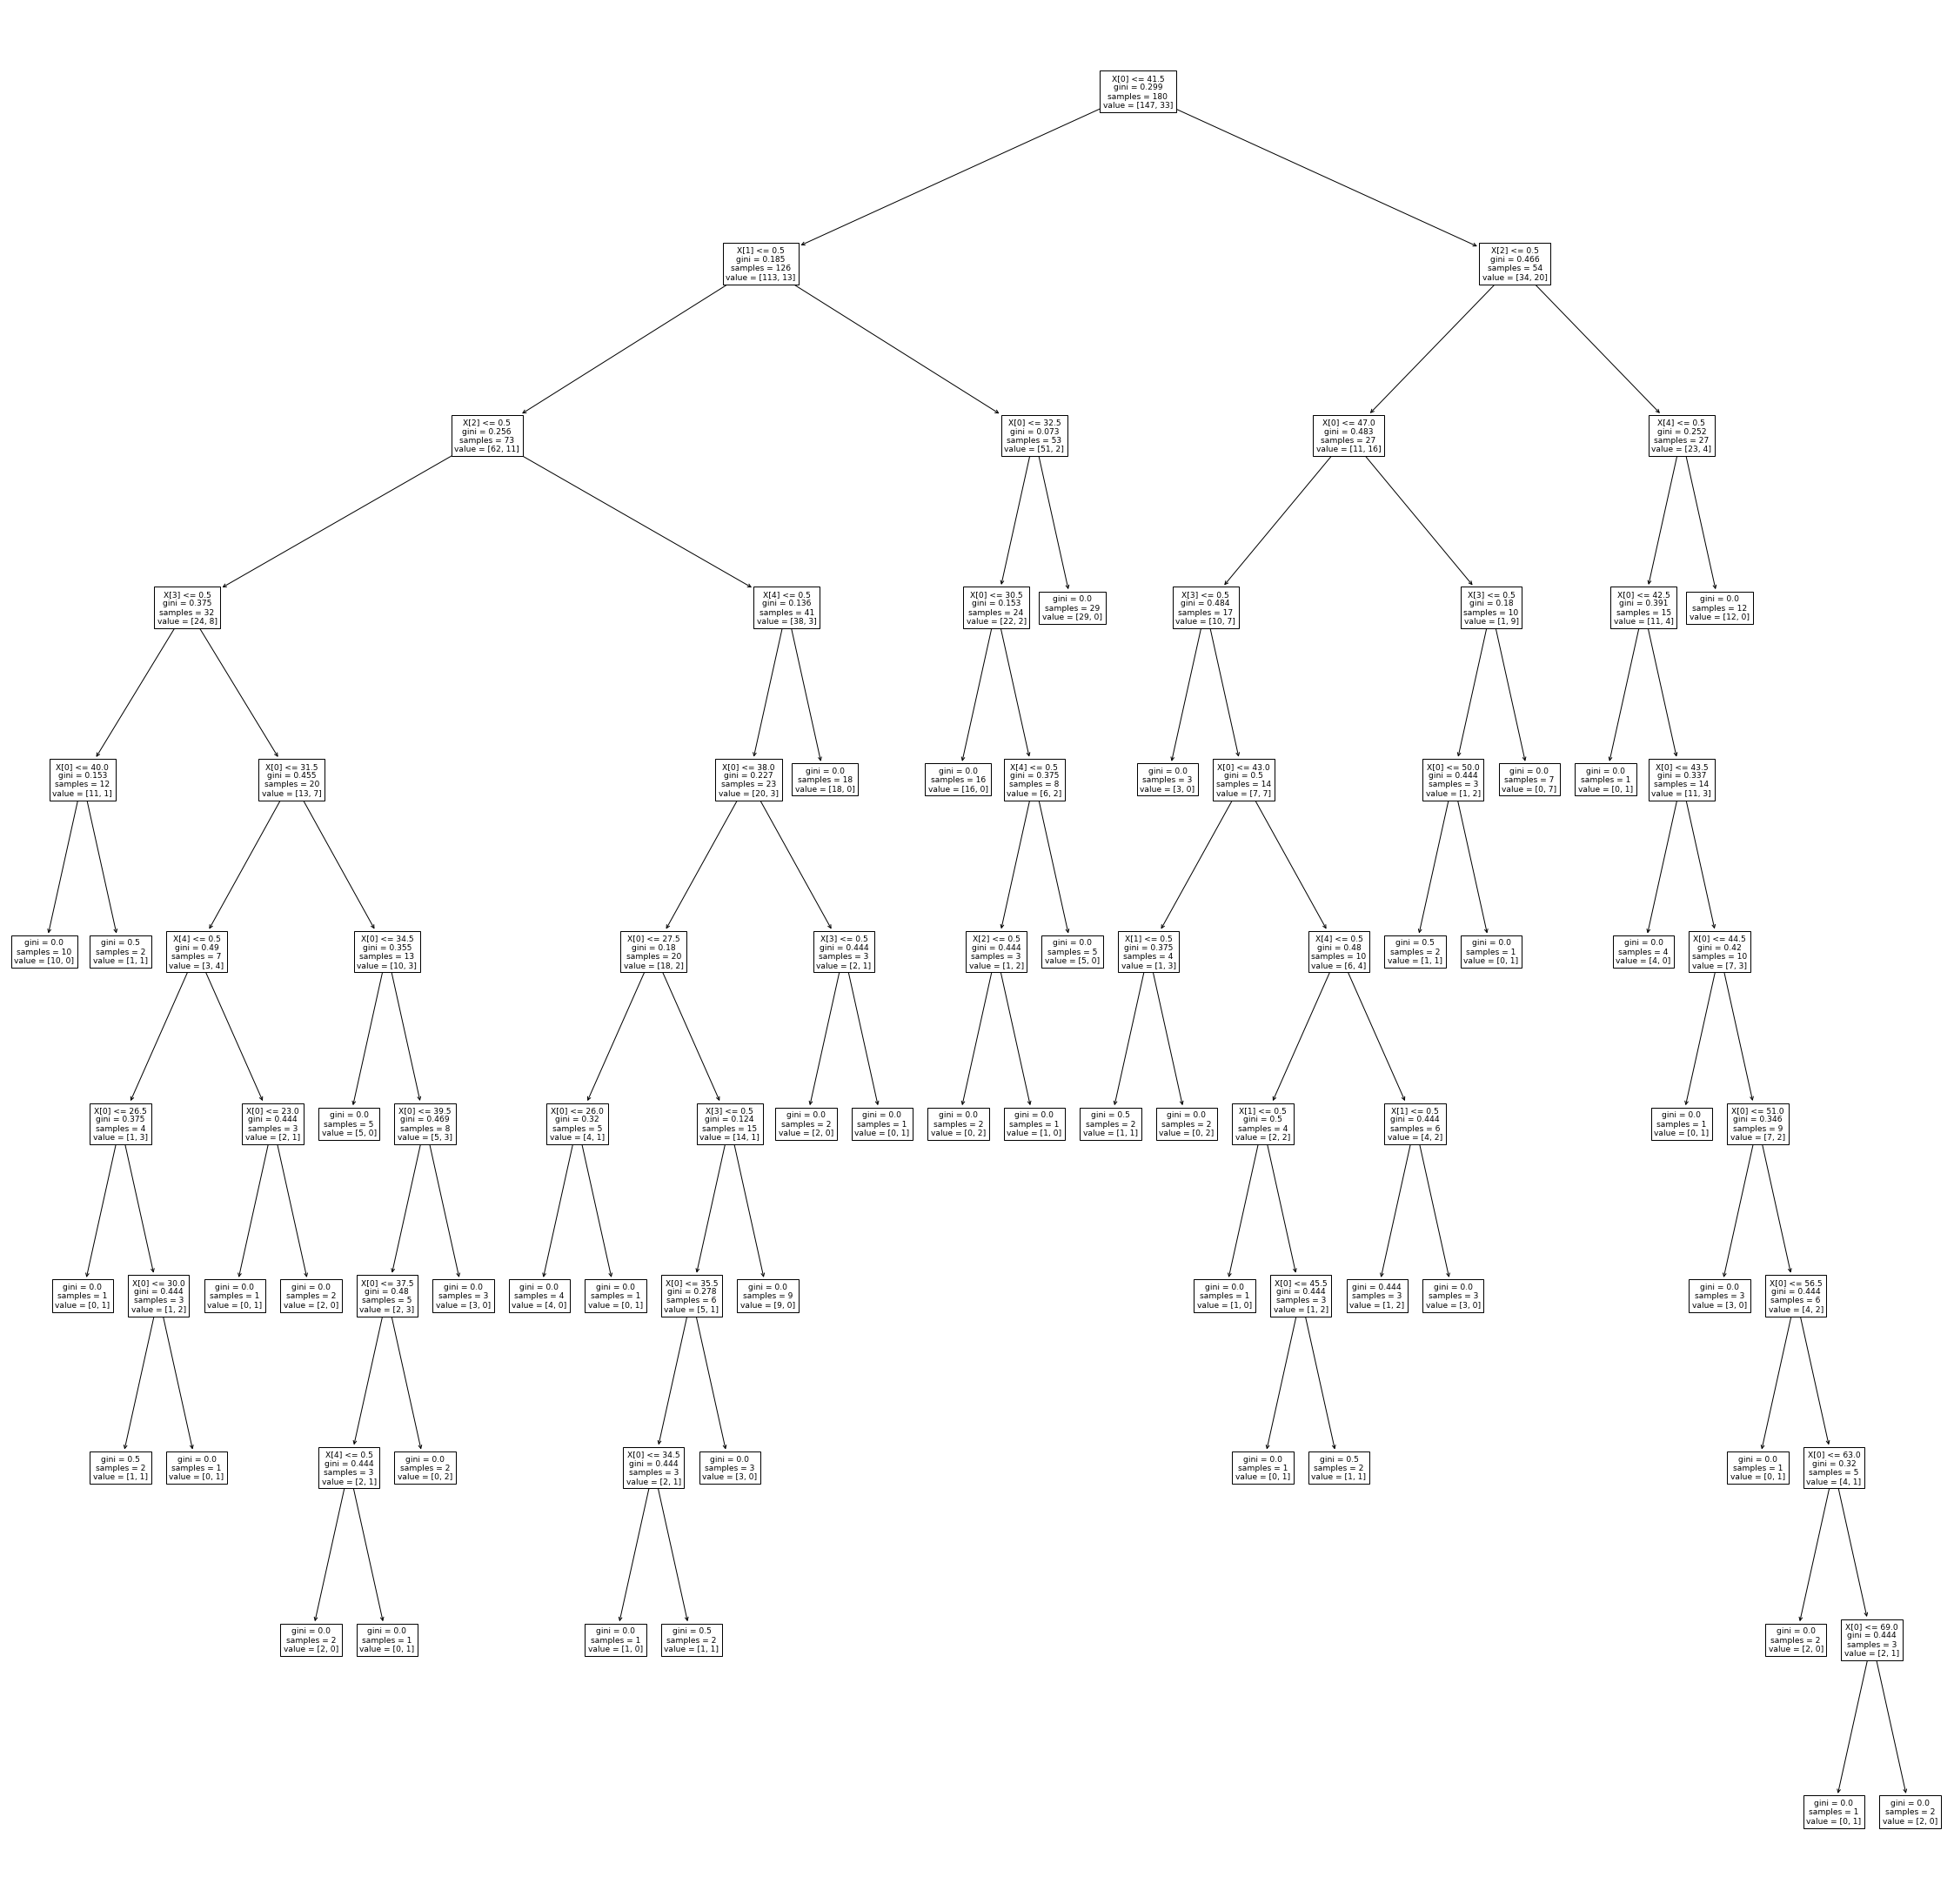

In [ ]:
# Visualise the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(40, 40))
plot_tree(dtree, feature_names=X_train.columns, filled=True, fontsize=20,
          rounded=True)
plt.show()
